<a href="https://colab.research.google.com/github/FelixMedrano/Deep_Learning/blob/main/FelixMedrano_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Felix Medrano


Assignment 3

z23444270

https://colab.research.google.com/drive/1Y0Lt9MME235WtRemA4_H6-Xu8XpSd9sn?usp=sharing




# Problem 1

1.1 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#creates class
class NeuralNetwork(object):
  def __init__(self,num_param=2):
    #sets learning rate and weight matrix
    self.weight_matrix= 2 * (np.random.random((num_param+1, 1)))-1
    print(self.weight_matrix)
    self.l_rate=1

  #hard limiter to label based on rules
  def hard_limiter(self, x):
    outs=np.zeros(x.shape)
    outs[x>0]=1
    return outs

  #forward propagation for dot product
  def forward_propagation(self,inputs):
    
    outs=np.dot(inputs,self.weight_matrix)
    return self.hard_limiter(outs)

   #used to train the weights
  def train (self,train_inputs,train_outputs,num_train_iterations=10):
    for iteration in range(num_train_iterations):
      for i in range(train_inputs.shape[0]):
        pred_i=self.pred(train_inputs[i,:])
        if pred_i !=train_outputs[i]:
          output=self.forward_propagation(train_inputs[i,:])
          error=train_outputs[i]-output
          adjustment=self.l_rate*error*train_inputs[i]
          self.weight_matrix[:,0]+=adjustment

          print('Iteration #'+str(iteration))
          plot_fun_thr(train_inputs[:,0:2],train_outputs,self.weight_matrix[:,0],classes)

  #used to predict
  def pred(self,inputs):
    prob=self.forward_propagation(inputs)
    preds=np.int8(prob>=.5)
    return preds

# plots first graph of just the classes
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^')
  plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
  plt.show

#plots the classifier line on plot
def plot_fun_thr(features,labels,thre_parms,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^')
  plt.axis([-3,3,-3,3])
  x1=np.linspace(-3,3,50)
  x2=-(thre_parms[0]*x1+thre_parms[2])/thre_parms[1]
  plt.plot(x1,x2,'-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
  plt.pause(0.5)
  plt.show


[[ 2  0]
 [ 2  1]
 [ 0  0]
 [-2  1]]
[1 0 1 0]


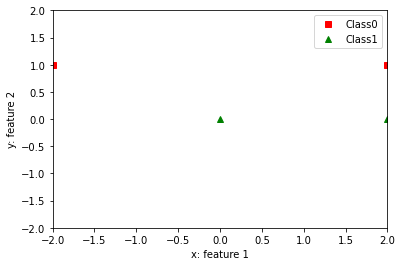

In [ ]:
#defines deatures,labels, and classes
features=np.array([[2,0],[2,1],[0,0],[-2,1]])
print(features)
labels=np.array([1,0,1,0])
print(labels)
classes=[0,1]

plot_fun(features,labels,classes)

In [ ]:
#appends bias 
bias=np.ones((features.shape[0],1))
print(bias)
features=np.append(features,bias,axis=1)
print(features.shape)

[[1.]
 [1.]
 [1.]
 [1.]]
(4, 3)


1.1 solution

[[ 0.6041647 ]
 [-0.49450655]
 [-0.40502948]]
Random weights at the start of training
[[ 0.6041647 ]
 [-0.49450655]
 [-0.40502948]]
Iteration #0


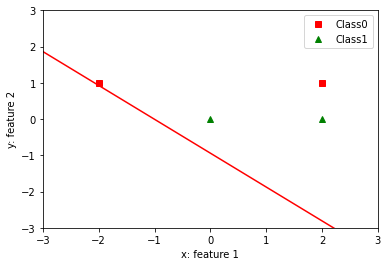

Iteration #0


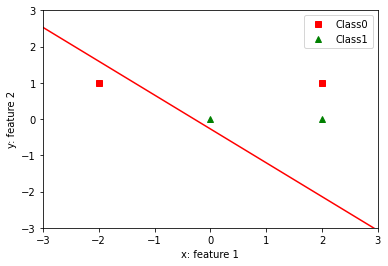

Iteration #0


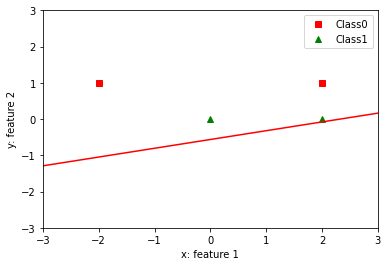

Iteration #1


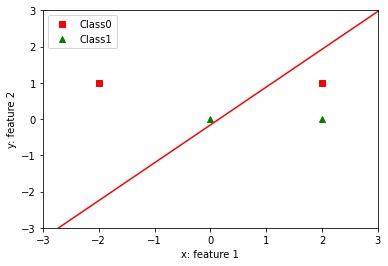

Iteration #1


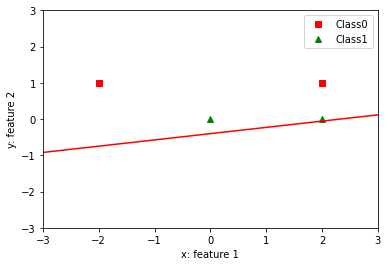

Iteration #1


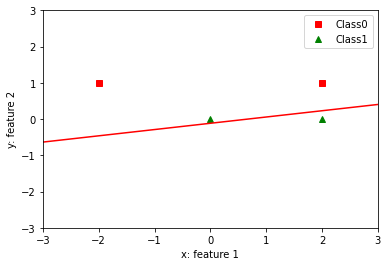

Iteration #2


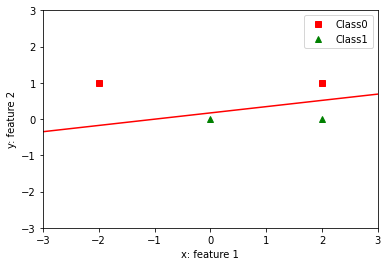

New weights after training
[[ 0.6041647 ]
 [-3.49450655]
 [ 0.59497052]]
Testing network on new examples ->
[[1]
 [0]
 [1]
 [0]]
Testing network on new examples ->
[0]


In [ ]:
#prints plot and classifier line
neural_network=NeuralNetwork(2)
print('Random weights at the start of training')
print(neural_network.weight_matrix)
neural_network.train(features,labels,10)

print('New weights after training')
print(neural_network.weight_matrix)

print('Testing network on new examples ->')
print(neural_network.pred(features))


print('Testing network on new examples ->')
print(neural_network.pred(np.array([1,1,1])))

Part e table:

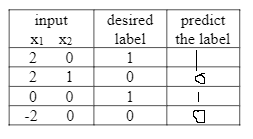

# Problem 2

2.1 work

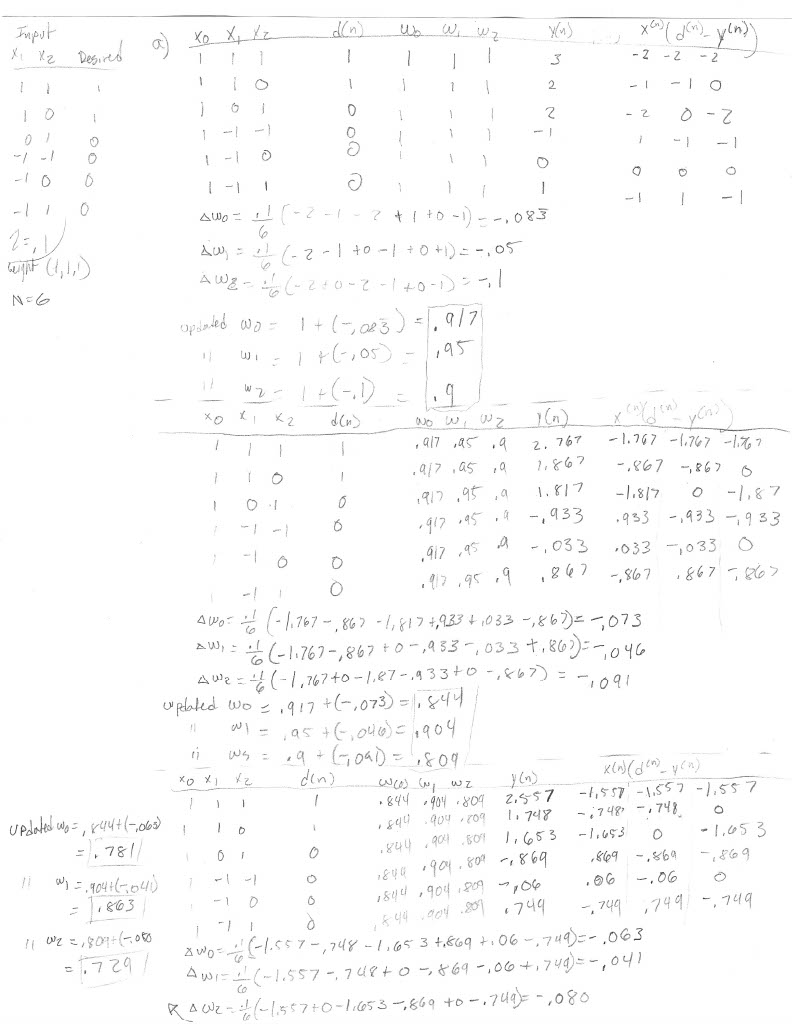

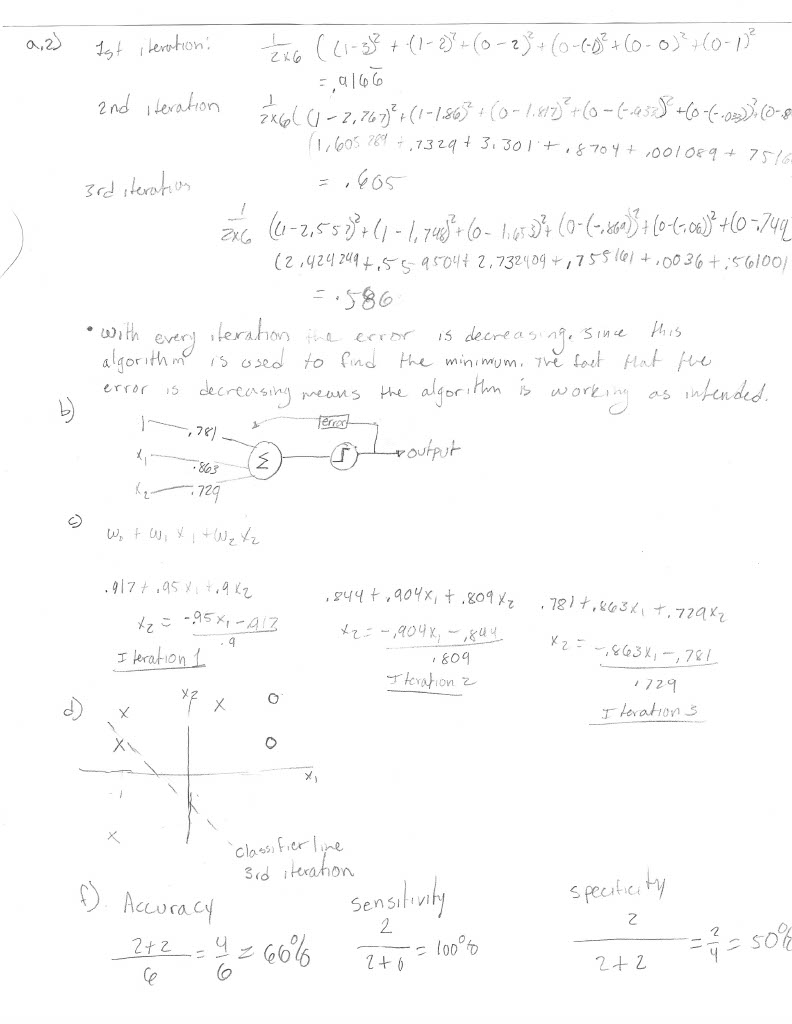

# Problem 3

3.1 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#class
class NeuralNetwork(object):
  def __init__(self):
    self.weight_matrix=2* np.random.random((3,1))-1
    self.l_rate=1
    #history variable to append cost and weight
    self.history={'cost':np.zeros(0),
                  'weight':np.zeros(0),
                  }
    self.hist_cost=np.zeros(0)
    self.hist_weight=np.zeros(0)
    self.Cost=0
    #hard limiter
  def hard_limiter(self, x):
    outs=np.zeros(x.shape)
    outs[x>0]=1
    return outs

  #forward propagation for dot product
  def forward_propagation(self,inputs):
    
    outs=np.dot(inputs,self.weight_matrix)
    return outs

  #train weights 
  def train_GDL(self,train_inputs,train_outputs,num_train_iterations=10, learning_r=1):
    N=train_inputs.shape[0]
   
    self.l_rate=learning_r
    print("These are the progressional graphs for l_rate: "+ str(self.l_rate))
    for iteration in range(num_train_iterations):
      
      output=self.forward_propagation(train_inputs)
      error=train_outputs-output
      adjustment=(self.l_rate/N)*np.sum(np.multiply(error,train_inputs),axis=0)
      
      #calculate cost and append
      for i in range(N):
        self.Cost+= error[i]*error[i]

      self.Cost=self.Cost/(2*N)
      self.hist_cost=np.append(self.hist_cost,self.Cost)
      
      
      
      self.weight_matrix[:,0] +=adjustment
      self.hist_weight=np.append(self.hist_weight,self.weight_matrix)
      #print every 5 iterations
      if iteration % 5 ==0:
        print('Iteration #'+ str(iteration)+ "for l_rate: "+str(self.l_rate))
        plot_fun_thr(train_inputs[:,0:2],train_outputs[:,0],self.weight_matrix[:,0],classes)
    
   #predict
  def pred(self,inputs):
    preds=self.forward_propagation(inputs)
    preds[preds<0]=-1
    preds[preds>0]=1
    return preds

#plot first graph of just points
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^')
  plt.axis([-4,4,-4,4])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
  plt.show

def plot_fun_thr(features,labels,thre_parms,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^')
  plt.axis([-4,4,-4,4])
  x1=np.linspace(-4,4,50)
  x2=-(thre_parms[0]*x1+thre_parms[2])/thre_parms[1]
  plt.plot(x1,x2,'-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
  plt.pause(0.5)
  plt.show

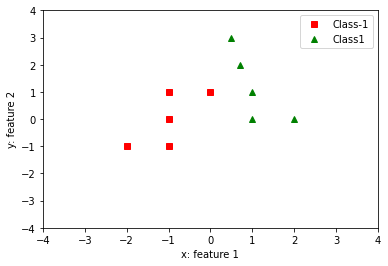

In [ ]:
#fills necessary variables
features=np.array([[1,1],[1,0],[0,1],[-1,-1],[.5,3],[.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])

labels=np.array([1,1,-1,-1,1,1,-1,-1,1,-1])

classes=[-1,1]

plot_fun(features,labels,classes)

In [ ]:
#adds bias
bias=np.ones((features.shape[0],1))
print(bias)
features=np.append(features,bias,axis=1)
print(features.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(10, 3)


3.2 solution

Random weights at the start of training
[[ 0.29446176]
 [-0.32831193]
 [-0.34851713]]
These are the progressional graphs for l_rate: 1
Iteration #0for l_rate: 1


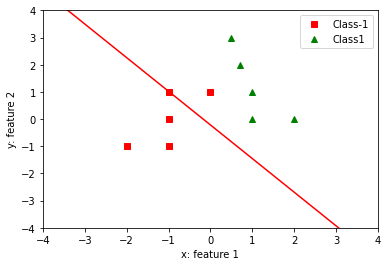

Iteration #5for l_rate: 1


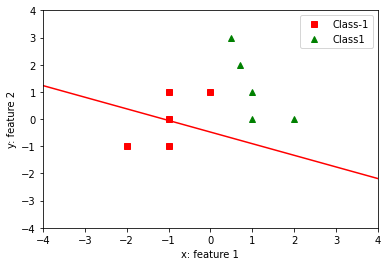

Iteration #10for l_rate: 1


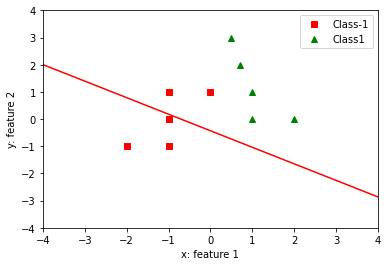

Iteration #15for l_rate: 1


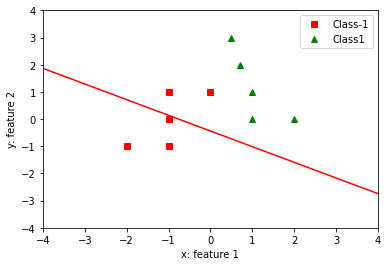

Iteration #20for l_rate: 1


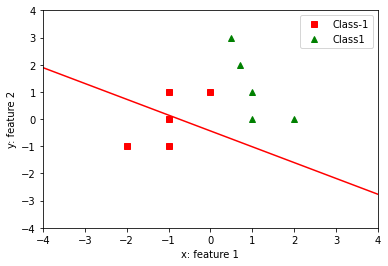

Iteration #25for l_rate: 1


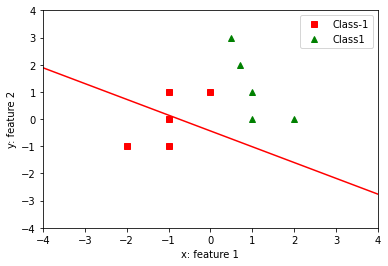

Iteration #30for l_rate: 1


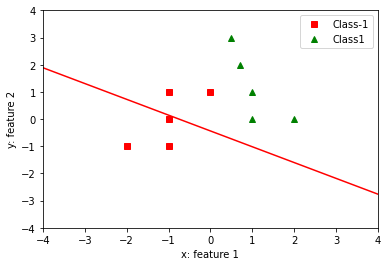

Iteration #35for l_rate: 1


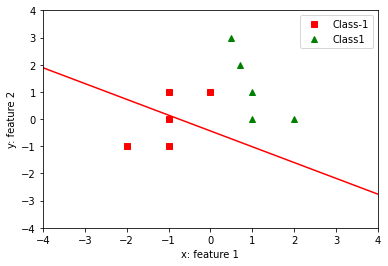

Iteration #40for l_rate: 1


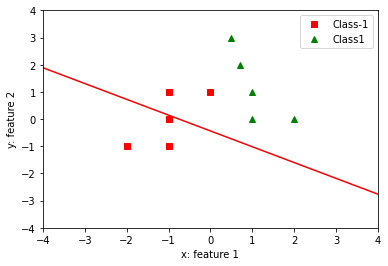

Iteration #45for l_rate: 1


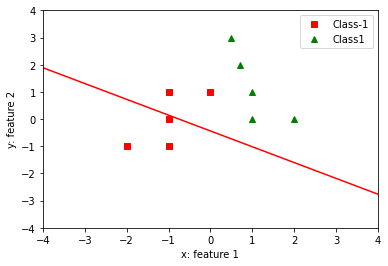

These are the progressional graphs for l_rate: 0.5
Iteration #0for l_rate: 0.5


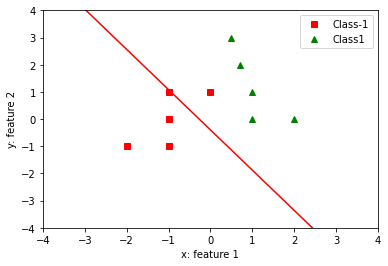

Iteration #5for l_rate: 0.5


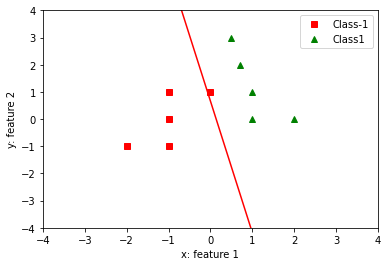

Iteration #10for l_rate: 0.5


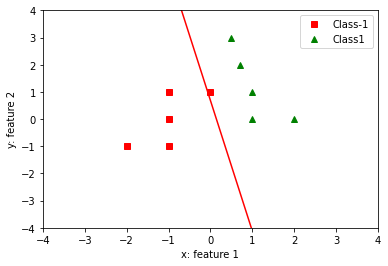

Iteration #15for l_rate: 0.5


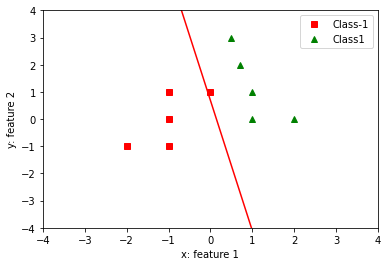

Iteration #20for l_rate: 0.5


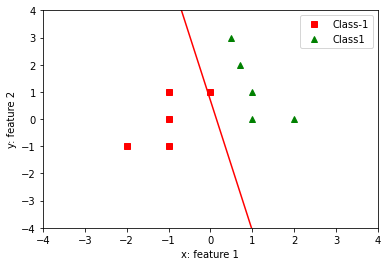

Iteration #25for l_rate: 0.5


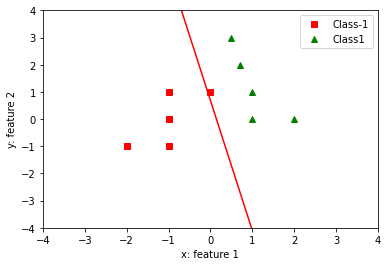

Iteration #30for l_rate: 0.5


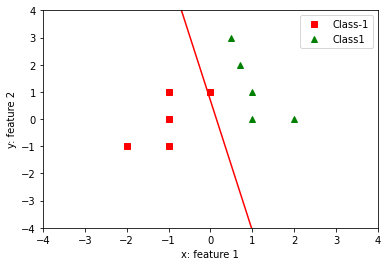

Iteration #35for l_rate: 0.5


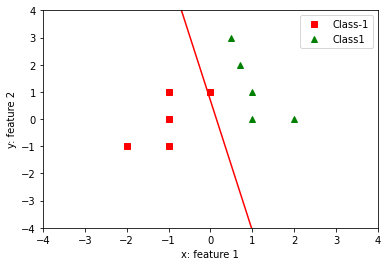

Iteration #40for l_rate: 0.5


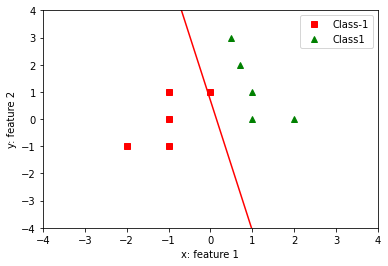

Iteration #45for l_rate: 0.5


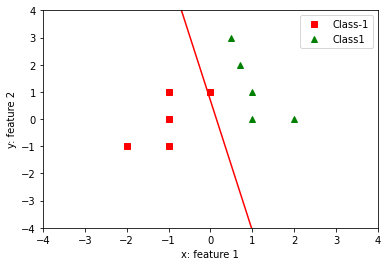

These are the progressional graphs for l_rate: 0.05
Iteration #0for l_rate: 0.05


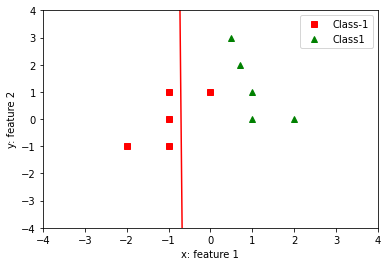

Iteration #5for l_rate: 0.05


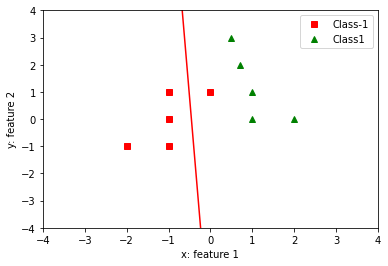

Iteration #10for l_rate: 0.05


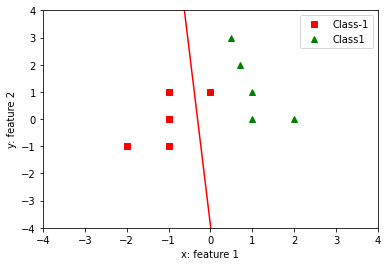

Iteration #15for l_rate: 0.05


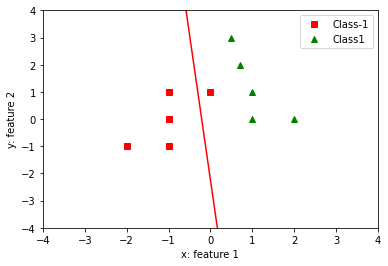

Iteration #20for l_rate: 0.05


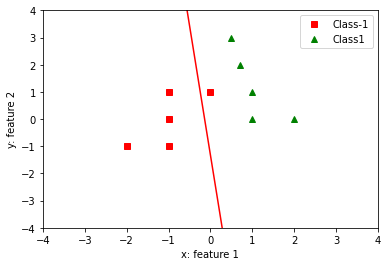

Iteration #25for l_rate: 0.05


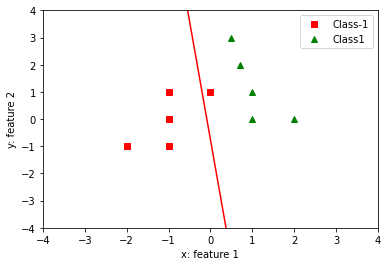

Iteration #30for l_rate: 0.05


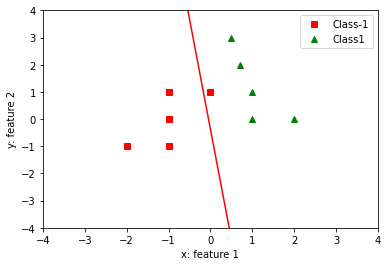

Iteration #35for l_rate: 0.05


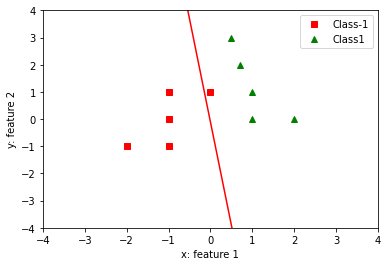

Iteration #40for l_rate: 0.05


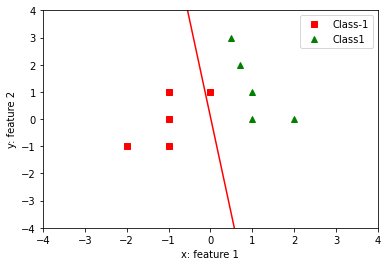

Iteration #45for l_rate: 0.05


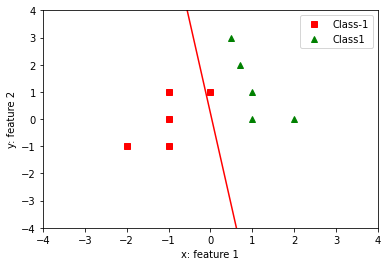

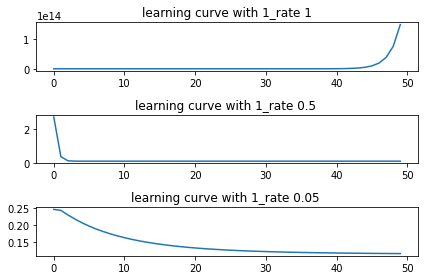

In [ ]:
plt.figure
#sets variable to class and calls all functions above for every learning rate
neural_network1=NeuralNetwork()
print('Random weights at the start of training')
print(neural_network1.weight_matrix)

neural_network1.train_GDL(features,np.expand_dims(labels,axis=1),50,1)

neural_network2=NeuralNetwork()
neural_network2.train_GDL(features,np.expand_dims(labels,axis=1),50,0.5)


neural_network3=NeuralNetwork()
neural_network3.train_GDL(features,np.expand_dims(labels,axis=1),50,0.05)


#subplots for every learning rate
plt.subplot(3,1,1)
plt.plot(np.arange(0,50),neural_network1.hist_cost)
plt.title("learning curve with 1_rate 1")

plt.subplot(3,1,2)
plt.plot(np.arange(0,50),neural_network2.hist_cost)
plt.title("learning curve with 1_rate 0.5 ")

plt.subplot(3,1,3)
plt.plot(np.arange(0,50),neural_network3.hist_cost)
plt.title("learning curve with 1_rate 0.05 ")


plt.tight_layout()
plt.show()


question 3 part m

The behavior that can be observed from the learning curves is that for a learning rate of 1 the cost starts relatively low and increases with every epoch. This indicates the machine is not learning very well and requires that the learning rate lowers. Once the learning rates are dropped the machine begins to learn muhc better as seen with the decreasing cost values. More specifically, with a learning rate of 0.5 the cost values decrease at a much faster rate as seen by the cost values between epoch's 0-20 where the values are much lower where the learning rate is 0.5. This is a clear indication that for this machine the most suitable learning rate is that of 0.5